## Facial Emotion Recognition using AlexNet

### Import and Installation

In [62]:
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import numpy as np
import pathlib
import datetime



# printout versions
%pip install tensorflow-addons
print(f"Tensorflow version: {tf.__version__}")
print(f"Numpy version: {np.version.version}")

Note: you may need to restart the kernel to use updated packages.
Tensorflow version: 2.12.0
Numpy version: 1.23.5



[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Get/Set Data Info

In [63]:
data_train_dir = pathlib.Path("./dataset/train/")
data_test_dir = pathlib.Path("./dataset/test/")
image_count = len(list(data_train_dir.glob('*/*.png')))
BATCH_SIZE = 32             
IMG_HEIGHT = 227            
IMG_WIDTH = 227             
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)
print("Training Data count:" + str(image_count))

class_names = np.array([item.name for item in data_train_dir.glob('*') if item.name != ".DS_Store"])
print("Class Names:\n" + str(class_names))
class_count = len(class_names)
print("Class Count:\n" + str(class_count))

Training Data count:28709
Class Names:
['angry' 'disgusted' 'fearful' 'happy' 'neutral' 'sad' 'surprised']
Class Count:
7


### AlexaNet Model

In [64]:
model = tf.keras.models.Sequential([
  # Conv Layer 1
  tf.keras.layers.Conv2D(96, (11,11),strides=(4,4), activation='relu', input_shape=(227, 227, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2,2)),
  # Conv Layer 2
  tf.keras.layers.Conv2D(256, (11,11),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  # Conv Layer 3
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  # Conv Layer 4
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  # Conv Layer 5
  tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2, 2)),
  # Flattern after Conv layers
  tf.keras.layers.Flatten(),
  # FC1
  tf.keras.layers.Dense(4096, activation='relu'),
  #tf.keras.layers.Dropout(0.5),
  # FC2
  tf.keras.layers.Dense(4096, activation='relu'),
  #tf.keras.layers.Dropout(0.5),
  # FC3 classifier  
  tf.keras.layers.Dense(class_count, activation='sigmoid')
])

### Data Generator 

In [65]:
# normalize images to [0-1] interval
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
# training_data for model training
train_data_generator = image_generator.flow_from_directory(directory=str(data_train_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH), 
                                                     classes = list(class_names))

test_data_generator = image_generator.flow_from_directory(directory=str(data_test_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH), 
                                                     classes = list(class_names))

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### Model

In [66]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.SensitivityAtSpecificity(0.5), tf.keras.metrics.SpecificityAtSensitivity(0.5), tf.keras.metrics.AUC(curve='ROC')])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization_25 (Bat  (None, 55, 55, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 27, 27, 256)       2973952   
                                                                 
 batch_normalization_26 (Bat  (None, 27, 27, 256)      1024      
 chNormalization)                                                
                                                      

### Train

In [24]:
import time
start = time.time()
history = model.fit(train_data_generator, steps_per_epoch=STEPS_PER_EPOCH, 
                    epochs=20, validation_data=test_data_generator)

# Saving the model
model.save('AlexNet_FER_Model_20Epoch/')
print("Total time: ", time.time() - start, "seconds")

Epoch 1/20
898/898 [==============================] - 2895s 3s/step - loss: 2.6381 - accuracy: 0.2911 - precision_2: 0.1905 - recall_2: 0.7896 - sensitivity_at_specificity_2: 0.7319 - specificity_at_sensitivity_2: 0.7155 - auc_2: 0.6705 - val_loss: 1.6751 - val_accuracy: 0.3406 - val_precision_2: 0.1884 - val_recall_2: 0.8955 - val_sensitivity_at_specificity_2: 0.7712 - val_specificity_at_sensitivity_2: 0.7416 - val_auc_2: 0.7033
Epoch 2/20
898/898 [==============================] - 2864s 3s/step - loss: 1.6577 - accuracy: 0.3514 - precision_2: 0.1967 - recall_2: 0.8781 - sensitivity_at_specificity_2: 0.7981 - specificity_at_sensitivity_2: 0.7644 - auc_2: 0.7183 - val_loss: 1.6342 - val_accuracy: 0.3541 - val_precision_2: 0.1920 - val_recall_2: 0.9005 - val_sensitivity_at_specificity_2: 0.8057 - val_specificity_at_sensitivity_2: 0.7721 - val_auc_2: 0.7223
Epoch 3/20
898/898 [==============================] - 2851s 3s/step - loss: 1.7394 - accuracy: 0.3197 - precision_2: 0.1867 - recall

INFO:tensorflow:Assets written to: AlexNet_FER_Model_20Epoch/assets


INFO:tensorflow:Assets written to: AlexNet_FER_Model_20Epoch/assets


Total time:  57070.83656454086 seconds


### Plot result

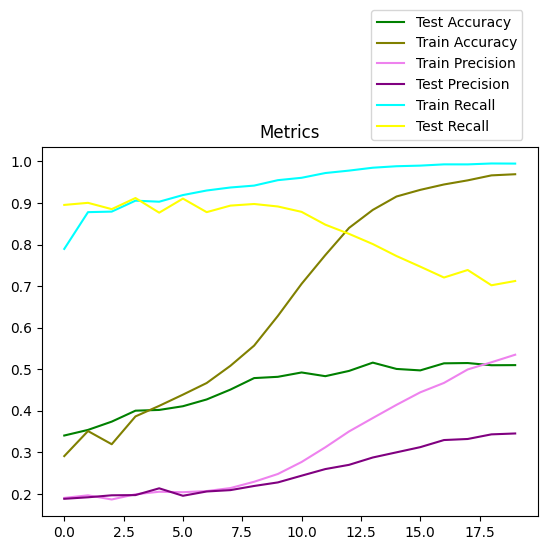

In [42]:
def plot_result(history):
    plt.plot(history.history["val_accuracy"],color='green')
    plt.plot(history.history["accuracy"],color='olive')
    plt.plot(history.history["precision_2"],color='violet')
    plt.plot(history.history["val_precision_2"],color='purple')
    plt.plot(history.history["recall_2"],color='cyan')
    plt.plot(history.history["val_recall_2"],color='yellow')
    plt.title("Metrics")
    
    plt.legend(["Test Accuracy", "Train Accuracy", "Train Precision", "Test Precision", "Train Recall", "Test Recall" ], bbox_to_anchor =(0.65, 1.00))
    plt.show()

plot_result(history)

### 20 Epoch - Dropout = 0.2

In [67]:
model_2 = tf.keras.models.Sequential([
  # Conv Layer 1
  tf.keras.layers.Conv2D(96, (11,11),strides=(4,4), activation='relu', input_shape=(227, 227, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2,2)),
  # Conv Layer 2
  tf.keras.layers.Conv2D(256, (11,11),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  # Conv Layer 3
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  # Conv Layer 4
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  # Conv Layer 5
  tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2, 2)),
  # Flattern after Conv layers
  tf.keras.layers.Flatten(),
  # FC1
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  # FC2
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  # FC3 classifier  
  tf.keras.layers.Dense(class_count, activation='sigmoid')
])

In [68]:
model_2.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.SensitivityAtSpecificity(0.5), tf.keras.metrics.SpecificityAtSensitivity(0.5), tf.keras.metrics.AUC(curve='ROC')])
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization_30 (Bat  (None, 55, 55, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 27, 27, 256)       2973952   
                                                                 
 batch_normalization_31 (Bat  (None, 27, 27, 256)      1024      
 chNormalization)                                                
                                                      

In [69]:
import time
start = time.time()
history_2 = model_2.fit(train_data_generator, steps_per_epoch=STEPS_PER_EPOCH, 
                    epochs=20, validation_data=test_data_generator)

# Saving the model
model_2.save('AlexNet_FER_Model_20Epoch_Dropout_0.2/')
print("Total time: ", time.time() - start, "seconds")



Epoch 1/20
898/898 [==============================] - 3351s 4s/step - loss: 2.9881 - accuracy: 0.2688 - precision_12: 0.1816 - recall_6: 0.8269 - sensitivity_at_specificity_6: 0.7011 - specificity_at_sensitivity_6: 0.6829 - auc_6: 0.6488 - val_loss: 1.8409 - val_accuracy: 0.2966 - val_precision_12: 0.1735 - val_recall_6: 0.9097 - val_sensitivity_at_specificity_6: 0.7208 - val_specificity_at_sensitivity_6: 0.7101 - val_auc_6: 0.6706
Epoch 2/20
898/898 [==============================] - 3208s 4s/step - loss: 1.7428 - accuracy: 0.3226 - precision_12: 0.1920 - recall_6: 0.8135 - sensitivity_at_specificity_6: 0.7446 - specificity_at_sensitivity_6: 0.7164 - auc_6: 0.6808 - val_loss: 1.7096 - val_accuracy: 0.3220 - val_precision_12: 0.2041 - val_recall_6: 0.7623 - val_sensitivity_at_specificity_6: 0.7575 - val_specificity_at_sensitivity_6: 0.7322 - val_auc_6: 0.6958
Epoch 3/20
898/898 [==============================] - 3207s 4s/step - loss: 1.6699 - accuracy: 0.3482 - precision_12: 0.2023 - r

INFO:tensorflow:Assets written to: AlexNet_FER_Model_20Epoch_Dropout_0.2/assets


INFO:tensorflow:Assets written to: AlexNet_FER_Model_20Epoch_Dropout_0.2/assets


Total time:  62191.7887673378 seconds


dict_keys(['loss', 'accuracy', 'precision_12', 'recall_6', 'sensitivity_at_specificity_6', 'specificity_at_sensitivity_6', 'auc_6', 'val_loss', 'val_accuracy', 'val_precision_12', 'val_recall_6', 'val_sensitivity_at_specificity_6', 'val_specificity_at_sensitivity_6', 'val_auc_6'])


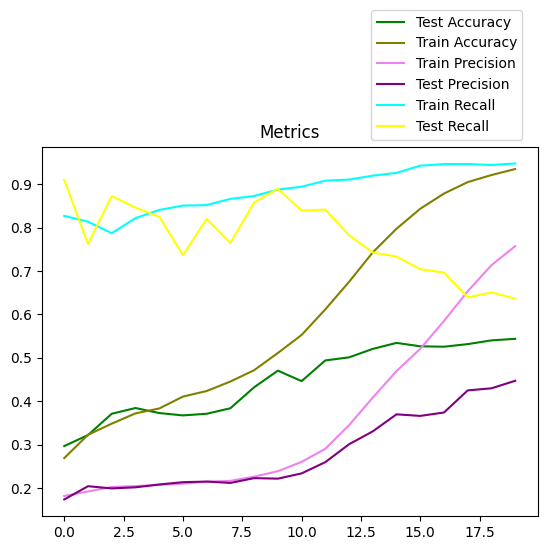

In [78]:
def plot_result_2(history):
    print(history.history.keys())
    plt.plot(history.history["val_accuracy"],color='green')
    plt.plot(history.history["accuracy"],color='olive')
    plt.plot(history.history["precision_12"],color='violet')
    plt.plot(history.history["val_precision_12"],color='purple')
    plt.plot(history.history["recall_6"],color='cyan')
    plt.plot(history.history["val_recall_6"],color='yellow')
    plt.title("Metrics")
    
    plt.legend(["Test Accuracy", "Train Accuracy", "Train Precision", "Test Precision", "Train Recall", "Test Recall" ], bbox_to_anchor =(0.65, 1.00))
    plt.show()

plot_result_2(history_2)

### 20 Epoch - Dropout 0.5

In [79]:
model_3 = tf.keras.models.Sequential([
  # Conv Layer 1
  tf.keras.layers.Conv2D(96, (11,11),strides=(4,4), activation='relu', input_shape=(227, 227, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2,2)),
  # Conv Layer 2
  tf.keras.layers.Conv2D(256, (11,11),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  # Conv Layer 3
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  # Conv Layer 4
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  # Conv Layer 5
  tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2, 2)),
  # Flattern after Conv layers
  tf.keras.layers.Flatten(),
  # FC1
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  # FC2
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  # FC3 classifier  
  tf.keras.layers.Dense(class_count, activation='sigmoid')
])

In [80]:
model_3.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.SensitivityAtSpecificity(0.5), tf.keras.metrics.SpecificityAtSensitivity(0.5), tf.keras.metrics.AUC(curve='ROC')])
model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization_35 (Bat  (None, 55, 55, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 27, 27, 256)       2973952   
                                                                 
 batch_normalization_36 (Bat  (None, 27, 27, 256)      1024      
 chNormalization)                                                
                                                      

In [81]:
import time
start = time.time()
history_3 = model_3.fit(train_data_generator, steps_per_epoch=STEPS_PER_EPOCH, 
                    epochs=20, validation_data=test_data_generator)

# Saving the model
model_3.save('AlexNet_FER_Model_20Epoch_Dropout_0.5/')
print("Total time: ", time.time() - start, "seconds")



Epoch 1/20
898/898 [==============================] - 2908s 3s/step - loss: 3.7946 - accuracy: 0.2453 - precision_13: 0.1738 - recall_7: 0.7868 - sensitivity_at_specificity_7: 0.6504 - specificity_at_sensitivity_7: 0.6365 - auc_7: 0.6093 - val_loss: 1.7727 - val_accuracy: 0.3016 - val_precision_13: 0.1710 - val_recall_7: 0.9085 - val_sensitivity_at_specificity_7: 0.6598 - val_specificity_at_sensitivity_7: 0.6562 - val_auc_7: 0.6385
Epoch 2/20
898/898 [==============================] - 2782s 3s/step - loss: 1.8456 - accuracy: 0.2634 - precision_13: 0.1801 - recall_7: 0.7856 - sensitivity_at_specificity_7: 0.6768 - specificity_at_sensitivity_7: 0.6463 - auc_7: 0.6288 - val_loss: 1.7436 - val_accuracy: 0.2672 - val_precision_13: 0.1794 - val_recall_7: 0.7512 - val_sensitivity_at_specificity_7: 0.6835 - val_specificity_at_sensitivity_7: 0.6295 - val_auc_7: 0.6315
Epoch 3/20
898/898 [==============================] - 2784s 3s/step - loss: 1.8166 - accuracy: 0.2559 - precision_13: 0.1822 - r

INFO:tensorflow:Assets written to: AlexNet_FER_Model_20Epoch_Dropout_0.5/assets


INFO:tensorflow:Assets written to: AlexNet_FER_Model_20Epoch_Dropout_0.5/assets


Total time:  56099.98050117493 seconds


dict_keys(['loss', 'accuracy', 'precision_13', 'recall_7', 'sensitivity_at_specificity_7', 'specificity_at_sensitivity_7', 'auc_7', 'val_loss', 'val_accuracy', 'val_precision_13', 'val_recall_7', 'val_sensitivity_at_specificity_7', 'val_specificity_at_sensitivity_7', 'val_auc_7'])


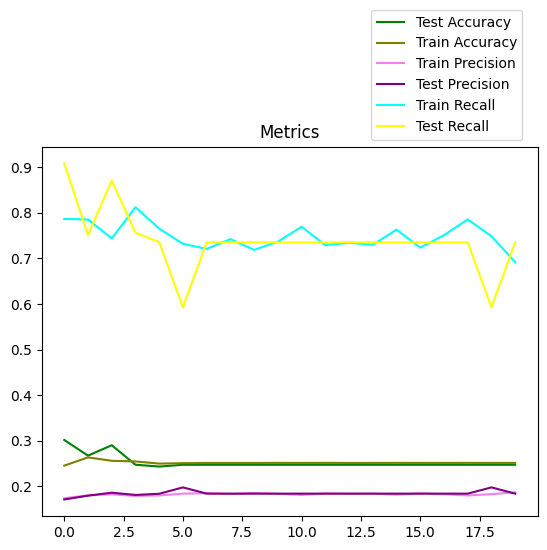

In [83]:
def plot_result_3(history):
    print(history.history.keys())
    plt.plot(history.history["val_accuracy"],color='green')
    plt.plot(history.history["accuracy"],color='olive')
    plt.plot(history.history["precision_13"],color='violet')
    plt.plot(history.history["val_precision_13"],color='purple')
    plt.plot(history.history["recall_7"],color='cyan')
    plt.plot(history.history["val_recall_7"],color='yellow')
    plt.title("Metrics")
    
    plt.legend(["Test Accuracy", "Train Accuracy", "Train Precision", "Test Precision", "Train Recall", "Test Recall" ], bbox_to_anchor =(0.65, 1.00))
    plt.show()

plot_result_3(history_3)

## Dropout 0.2 FC 2048 Neurons

In [84]:
model_4 = tf.keras.models.Sequential([
  # Conv Layer 1
  tf.keras.layers.Conv2D(96, (11,11),strides=(4,4), activation='relu', input_shape=(227, 227, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2,2)),
  # Conv Layer 2
  tf.keras.layers.Conv2D(256, (11,11),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  # Conv Layer 3
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  # Conv Layer 4
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  # Conv Layer 5
  tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2, 2)),
  # Flattern after Conv layers
  tf.keras.layers.Flatten(),
  # FC1
  tf.keras.layers.Dense(2048, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  # FC2
  tf.keras.layers.Dense(2048, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  # FC3 classifier  
  tf.keras.layers.Dense(class_count, activation='sigmoid')
])

In [85]:
model_4.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.SensitivityAtSpecificity(0.5), tf.keras.metrics.SpecificityAtSensitivity(0.5), tf.keras.metrics.AUC(curve='ROC')])
model_4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization_40 (Bat  (None, 55, 55, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 27, 27, 256)       2973952   
                                                                 
 batch_normalization_41 (Bat  (None, 27, 27, 256)      1024      
 chNormalization)                                                
                                                      

In [86]:
import time
start = time.time()
history_4 = model_4.fit(train_data_generator, steps_per_epoch=STEPS_PER_EPOCH, 
                    epochs=20, validation_data=test_data_generator)

# Saving the model
model_4.save('AlexNet_FER_Model_20Epoch_Dropout_0.2_FC2048/')
print("Total time: ", time.time() - start, "seconds")



Epoch 1/20
898/898 [==============================] - 2169s 2s/step - loss: 2.6157 - accuracy: 0.2816 - precision_14: 0.1857 - recall_8: 0.7862 - sensitivity_at_specificity_8: 0.7055 - specificity_at_sensitivity_8: 0.6880 - auc_8: 0.6519 - val_loss: 1.6805 - val_accuracy: 0.3422 - val_precision_14: 0.1994 - val_recall_8: 0.7866 - val_sensitivity_at_specificity_8: 0.7598 - val_specificity_at_sensitivity_8: 0.7282 - val_auc_8: 0.6902
Epoch 2/20
898/898 [==============================] - 2515s 3s/step - loss: 1.6900 - accuracy: 0.3339 - precision_14: 0.1985 - recall_8: 0.7981 - sensitivity_at_specificity_8: 0.7578 - specificity_at_sensitivity_8: 0.7261 - auc_8: 0.6901 - val_loss: 1.6442 - val_accuracy: 0.3614 - val_precision_14: 0.1928 - val_recall_8: 0.8905 - val_sensitivity_at_specificity_8: 0.7673 - val_specificity_at_sensitivity_8: 0.7651 - val_auc_8: 0.7136
Epoch 3/20
898/898 [==============================] - 2540s 3s/step - loss: 1.6157 - accuracy: 0.3674 - precision_14: 0.2111 - r

INFO:tensorflow:Assets written to: AlexNet_FER_Model_20Epoch_Dropout_0.2_FC2048/assets


INFO:tensorflow:Assets written to: AlexNet_FER_Model_20Epoch_Dropout_0.2_FC2048/assets


Total time:  50274.323892593384 seconds


dict_keys(['loss', 'accuracy', 'precision_14', 'recall_8', 'sensitivity_at_specificity_8', 'specificity_at_sensitivity_8', 'auc_8', 'val_loss', 'val_accuracy', 'val_precision_14', 'val_recall_8', 'val_sensitivity_at_specificity_8', 'val_specificity_at_sensitivity_8', 'val_auc_8'])


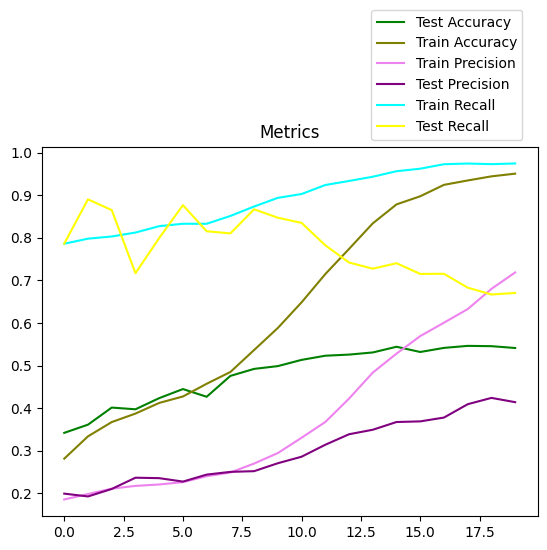

In [87]:
def plot_result_4(history):
    print(history.history.keys())
    plt.plot(history.history["val_accuracy"],color='green')
    plt.plot(history.history["accuracy"],color='olive')
    plt.plot(history.history["precision_14"],color='violet')
    plt.plot(history.history["val_precision_14"],color='purple')
    plt.plot(history.history["recall_8"],color='cyan')
    plt.plot(history.history["val_recall_8"],color='yellow')
    plt.title("Metrics")
    
    plt.legend(["Test Accuracy", "Train Accuracy", "Train Precision", "Test Precision", "Train Recall", "Test Recall" ], bbox_to_anchor =(0.65, 1.00))
    plt.show()

plot_result_4(history_4)